In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_csv('data\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe

<bound method NDFrame.describe of      gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none  

#EDA started


In [16]:
numerical_features = [ feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [ feature for feature in df.columns if df[feature].dtype == "O"]

print("numerical feature : {}".format(len(numerical_features), numerical_features))
print("categorical feature : {}".format(len(categorical_features), categorical_features))

numerical feature : 3
categorical feature : 5


In [18]:
df['total_score']= df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
reading_full = df[df['reading_score']==100]['average_score'].count()
math_full = df[df['math_score']==100]['average_score'].count()
writing_full = df[df['writing_score']==100]['average_score'].count()

In [33]:
reading_full
writing_full
math_full

np.int64(7)

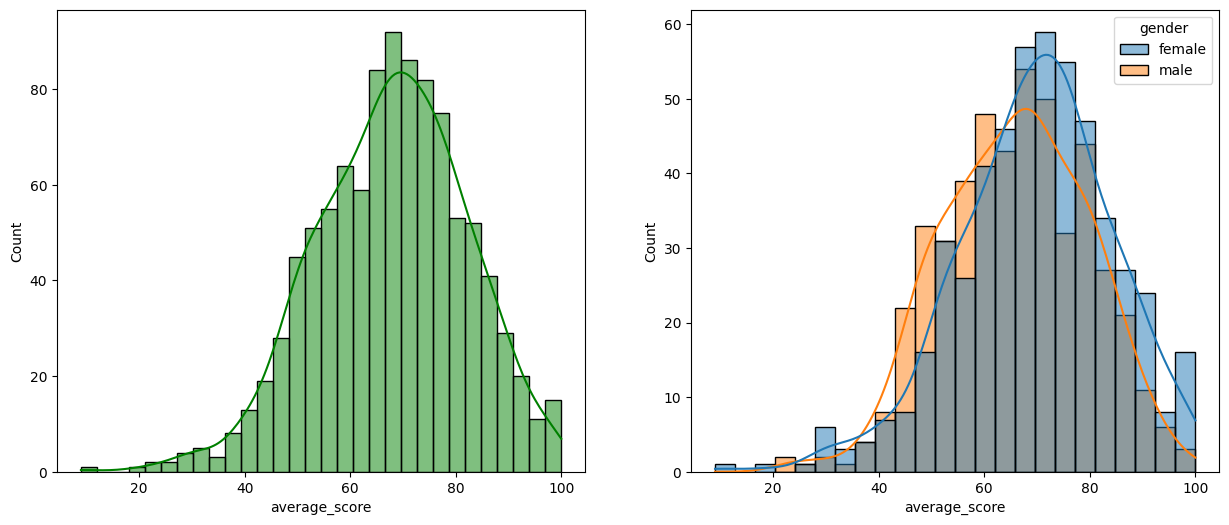

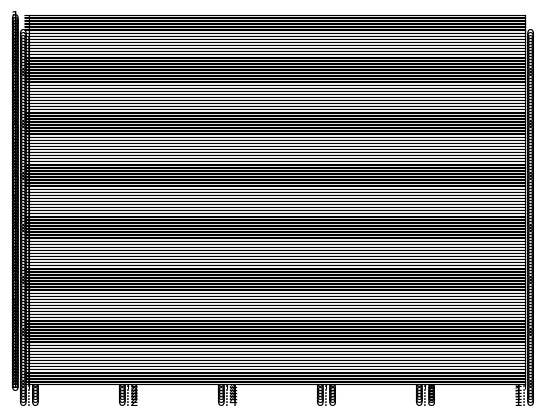

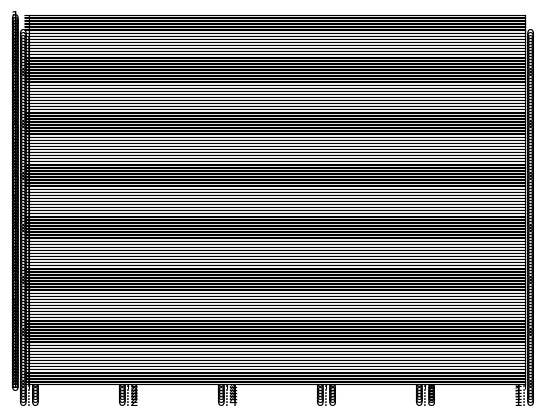

In [38]:
fig, axs = plt.subplots(1, 2, figsize= (15,6))
plt.subplots(121)
sns.histplot(data=df, x="average_score",bins=30, kde=True, color='g', ax=axs[0])
plt.subplots(121)
sns.histplot(data=df, x="average_score", kde=True, hue='gender', ax=axs[1])
plt.show()


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [40]:
df = pd.read_csv('data/stud.csv')

In [41]:
X = df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [42]:
y = df['math_score']

In [43]:
num_feature = X.select_dtypes(exclude="object").columns
cat_feature = X.select_dtypes(include="object").columns

In [44]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
onehotencoder = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", onehotencoder, cat_feature),
        ('StandardScaler', scaler, num_feature)
    ]

)

In [45]:
X = preprocessor.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train.shape, X_test.shape

((850, 19), (150, 19))

In [49]:
def evaluation_metric(true, prdicted):
    mae = mean_absolute_error(true, prdicted)
    mse = mean_squared_error(true, prdicted)
    rmse = np.sqrt(mean_squared_error(true, prdicted))
    r2_sq = r2_score(true, prdicted)
    return mae, rmse, r2_sq

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluation_metric(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluation_metric(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3454
- Mean Absolute Error: 4.2784
- R2 Score: 0.8718
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2528
- Mean Absolute Error: 4.0774
- R2 Score: 0.8947


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6381
- Mean Absolute Error: 5.2625
- R2 Score: 0.8022
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4214
- Mean Absolute Error: 4.9760
- R2 Score: 0.8426


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3456
- Mean Absolute Error: 4.2769
- R2 Score: 0.8717
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2513
- Mean Absolute Error: 4.0740
- R2 Score: 0.8947


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7308
- Mean Absolute Error: 4.5449
- R2 Score: 0.8526
-----------------------

In [51]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.894717
0,Linear Regression,0.894655
8,AdaBoost Regressor,0.871672
5,Random Forest Regressor,0.864799
7,CatBoosting Regressor,0.860337
6,XGBRegressor,0.848378
1,Lasso,0.842570
3,K-Neighbors Regressor,0.785609
4,Decision Tree,0.743814
